<a href="https://colab.research.google.com/github/Ch256981/IMLP347/blob/main/HW3_Ko_I_Hung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUDT 758J - HW3
## I-Hung Ko

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# read bank marketing dataset from OpenML repository
everything = fetch_openml(data_id=1461)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## EDA

In [3]:
# reads only data and target from the OpenML Bank Marketing Dataset
data, target = fetch_openml(data_id=1461, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# EDA on features/data/input-variables/input-fields/independent-variables
print(f'type = {type(data)}')
print(f'info = {type(data.info())}')
print(f'size = {data.size}')
print(f'shape = {data.shape}')
print(f'isna = {data.isna().sum()}')
print(f'items = {data.items}')
print(f'values = {data.values}')
data.describe()

type = <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  float64 
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  float64 
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  float64 
 10  V11     45211 non-null  category
 11  V12     45211 non-null  float64 
 12  V13     45211 non-null  float64 
 13  V14     45211 non-null  float64 
 14  V15     45211 non-null  float64 
 15  V16     45211 non-null  category
dtypes: category(9), float64(7)
memory usage: 2.8 MB
info = <class 'NoneType'>
size = 723376
shape = (45211, 16)
isna = V1     0
V2     0
V3     0
V4     0
V5    

,V1,V6,V10,V12,V13,V14,V15
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# report correlations
data.corr()

<ipython-input-5-18ab5e1faf56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,V1,V6,V10,V12,V13,V14,V15
V1,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
V6,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
V10,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
V12,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
V13,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
V14,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
V15,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<ipython-input-6-f581abb61eac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 8})


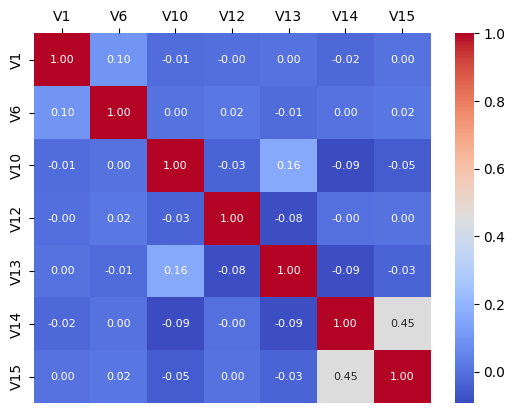

In [6]:
# report correlations
from seaborn import heatmap
corr_map = heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 8})
corr_map.xaxis.tick_top()

In [ ]:
from seaborn import scatterplot


## Transformation

In [7]:
import pandas as pd
df = pd.DataFrame({'Width' : [99.9, 66.6, 33.3], 'Height' : [5.5, 9.9, 1.1], 'Depth' : [0., .5, 1.]})
df

,Width,Height,Depth
0,99.9,5.5,0.0
1,66.6,9.9,0.5
2,33.3,1.1,1.0


In [8]:
from sklearn import preprocessing
preprocessing.StandardScaler().fit_transform(df)

array([[ 1.22474487e+00,  0.00000000e+00, -1.22474487e+00],
       [-5.22662806e-16,  1.22474487e+00,  0.00000000e+00],
       [-1.22474487e+00, -1.22474487e+00,  1.22474487e+00]])

## Data Preparation

In [9]:
# select numeric columns
import numpy as np
data.select_dtypes(np.number)

,V1,V6,V10,V12,V13,V14,V15
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0
...,...,...,...,...,...,...,...
45206,51.0,825.0,17.0,977.0,3.0,-1.0,0.0
45207,71.0,1729.0,17.0,456.0,2.0,-1.0,0.0
45208,72.0,5715.0,17.0,1127.0,5.0,184.0,3.0
45209,57.0,668.0,17.0,508.0,4.0,-1.0,0.0


In [10]:
# split training and testing dataset
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data.select_dtypes(np.number), target, test_size=0.2)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((36168, 7), (9043, 7), (36168,), (9043,))

## Classification Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rate_train = []
error_rate_test = []

for i in range(1, 19):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, target_train)

    pred_train = knn.predict(data_train)
    pred_test = knn.predict(data_test)

    error_rate_train.append(1 - accuracy_score(target_train, pred_train))
    error_rate_test.append(1 - accuracy_score(target_test, pred_test))
error_rate_train, error_rate_test

([0.0,
  0.07708471577084719,
  0.0744857332448573,
  0.09046671090466707,
  0.08972019464720193,
  0.09560937845609374,
  0.09530524220305248,
  0.09787657597876576,
  0.09757243972572438,
  0.10061380225613803,
  0.0997013934970139,
  0.10180269851802703,
  0.10158150851581504,
  0.10390400353904006,
  0.1033786772837868,
  0.1045952222959522,
  0.10442932979429331,
  0.1056735235567352],
 [0.14972907221054965,
  0.12164104832467104,
  0.12717018688488335,
  0.11555899590843743,
  0.11987172398540302,
  0.11423200265398648,
  0.11721773747650122,
  0.11445316819639495,
  0.11478491651000777,
  0.11423200265398648,
  0.1160013269932545,
  0.1145637509675993,
  0.11478491651000777,
  0.11423200265398648,
  0.11511666482362048,
  0.11434258542519071,
  0.11500608205241625,
  0.11356850602676105])

The optimal number of neighbors is 18


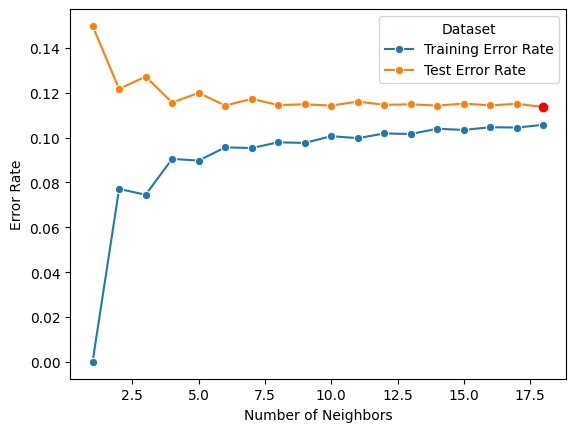

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

error_rate_df = pd.DataFrame({
    'Number of Neighbors': range(1, 19),
    'Training Error Rate': error_rate_train,
    'Test Error Rate': error_rate_test})

error_rate_melted = pd.melt(error_rate_df, id_vars=['Number of Neighbors'], value_vars=['Training Error Rate', 'Test Error Rate'],
                         var_name='Dataset', value_name='Error Rate')

lineplot = sns.lineplot(data=error_rate_melted, x='Number of Neighbors', y='Error Rate', hue='Dataset', marker='o')

optimal_neighbors = error_rate_df['Number of Neighbors'][error_rate_df['Test Error Rate'].idxmin()]

plt.scatter(optimal_neighbors, min(error_rate_test), color='red', label='Optimal Number of Neighbors', zorder=5)

optimal_k = np.argmin(error_rate_test) + 1
print(f"The optimal number of neighbors is {optimal_k}")

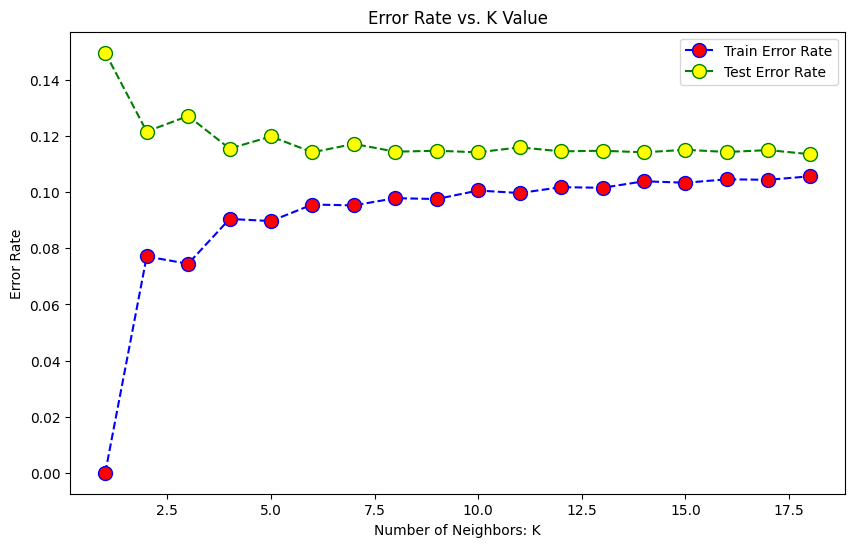

The optimal number of neighbors is 18


In [13]:
import matplotlib.pyplot as plt

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 19), error_rate_train, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10, label='Train Error Rate')
plt.plot(range(1, 19), error_rate_test, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10, label='Test Error Rate')
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# Find the optimal number of neighbors with the lowest error rate on the test set
optimal_k = np.argmin(error_rate_test) + 1
print(f"The optimal number of neighbors is {optimal_k}")

In [15]:
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k)
knn_optimal.fit(data_train, target_train)

pred = knn_optimal.predict(data.select_dtypes(np.number))

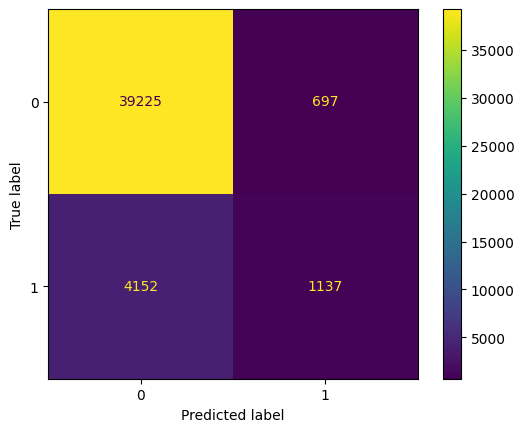

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target, pred)
ConfusionMatrixDisplay(cm).plot()

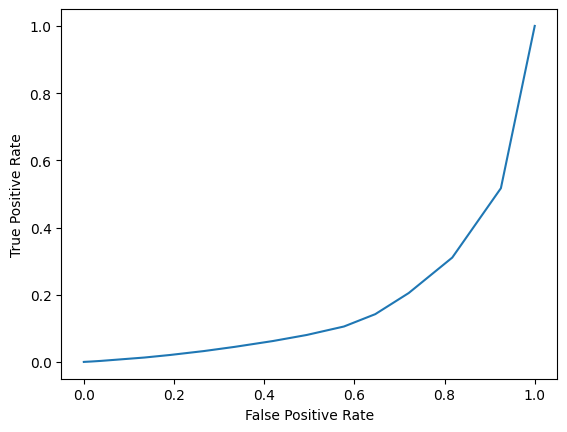

In [20]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_scores = knn_optimal.predict_proba(data_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, y_scores, pos_label='1')
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()